# Topic Modeling LDA

In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import utility as util
import plotly.graph_objects as go    #for data visualisation

In [2]:
#Let’s start by looking at the content of the file
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#import data_set
data = pd.read_csv('../data/java/allLDA.csv',encoding='latin1', low_memory=False)

# Print head
data.head()

,Column1,cvss3_bscore,description
0,0,7.5,"The XMLUI feature in DSpace before 3.6, 4.x be..."
1,1,5.4,JBoss BRMS 6 and BPM Suite 6 are vulnerable to...
2,2,9.8,Apache CloudStack 4.1 to 4.8.1.0 and 4.9.0.0 c...
3,3,7.5,"hawtio before versions 2.0-beta-1, 2.0-beta-2 ..."
4,4,9.0,It was discovered that the hawtio servlet 1.4 ...


In [3]:
#Data Cleaning
# Remove the columns
data = data.drop(columns=[ 'Column1', 'cvss3_bscore'], axis=1).sample(100)
# Print out the first rows of papers
data.head()

,description
434,Spring Security versions 4.2.x prior to 4.2.12...
1213,Jetty through 9.4.x is prone to a timing chann...
84,Primetek Primefaces 5.x is vulnerable to a wea...
917,Apache Archiva login service before 2.2.5 is v...
857,FasterXML jackson-databind 2.x before 2.9.10.8...


In [4]:
#Remove punctuation/lower casing
# simple preprocessing on the content of 'description'

# Load the regular expression library
import re
# Remove punctuation
data['paper_text_processed'] = \
data['description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['paper_text_processed'] = \
data['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data['paper_text_processed'].head()

434     spring security versions 42x prior to 4212 50x...
1213    jetty through 94x is prone to a timing channel...
84      primetek primefaces 5x is vulnerable to a weak...
917     apache archiva login service before 225 is vul...
857     fasterxml jackson-databind 2x before 29108 mis...
Name: paper_text_processed, dtype: object

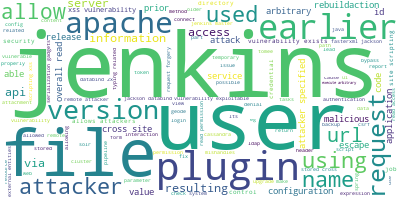

In [5]:
#Exploratory Analysis WORDCLOUD

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [6]:
#Prepare data for LDA Analysis 

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\ngruffer\anaconda33\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['spring', 'security', 'versions', 'prior', 'prior', 'prior', 'contain', 'insecure', 'randomness', 'vulnerability', 'using', 'setseed', 'configure', 'securerandom', 'instance', 'order', 'impacted', 'honest', 'application', 'must', 'provide', 'seed', 'make', 'resulting', 'random', 'material', 'available', 'attacker', 'inspection']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ngruffer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]


In [8]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"user" + 0.019*"jenkins" + 0.013*"earlier" + 0.013*"control" + '
  '0.012*"vulnerability" + 0.009*"tag" + 0.009*"scm" + 0.009*"names" + '
  '0.008*"allowing" + 0.008*"ui"'),
 (1,
  '0.016*"job" + 0.015*"plugin" + 0.014*"xss" + 0.014*"vulnerability" + '
  '0.013*"jenkins" + 0.011*"configuration" + 0.011*"stored" + 0.011*"issuer" + '
  '0.011*"resulting" + 0.010*"site"'),
 (2,
  '0.052*"rebuildaction" + 0.017*"earlier" + 0.015*"jenkins" + 0.013*"plugin" '
  '+ 0.012*"arbitrary" + 0.012*"csrf" + 0.011*"users" + 0.011*"xml" + '
  '0.011*"user" + 0.010*"allows"'),
 (3,
  '0.019*"api" + 0.014*"grails" + 0.013*"user" + 0.013*"vulnerability" + '
  '0.012*"plugin" + 0.012*"jenkins" + 0.010*"pipeline" + 0.010*"files" + '
  '0.010*"access" + 0.010*"earlier"'),
 (4,
  '0.017*"jenkins" + 0.015*"allows" + 0.015*"attacker" + 0.014*"related" + '
  '0.012*"using" + 0.011*"via" + 0.011*"credentials" + 0.011*"plugin" + '
  '0.010*"specified" + 0.010*"service"'),
 (5,
  '0.022*"apache" + 0.0

In [9]:
#import pyLDAvis.gensim
import pyLDAvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./data/java/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = os.path.join('../data/results/ldavis_prepared_'+str(num_topics))

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '../data/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

#data = pd.read_csv('../data/java/allLDA.csv',encoding='latin1', low_memory=False)
#../data/results/

C:\Users\ngruffer\anaconda33\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


FileNotFoundError: [Errno 2] No such file or directory: '../data/results/ldavis_prepared_10'